In [1]:
import os
import pickle
import numpy as np
import tensorflow.keras as keras
data_dir = "prepped_data/train/"

/home/hastings/anaconda3/envs/stylegan/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hastings/anaconda3/envs/stylegan/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hastings/anaconda3/envs/stylegan/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hastings/anaconda3/envs/styl

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', 
                 input_shape=(128, 128, 4)
                 
                ))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))              
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(12))

model.summary()

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=Adam(lr=.0002))




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      2368      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
__________

In [15]:
import ultrasoundgeneration
import importlib
importlib.reload(ultrasoundgeneration)


tdata, tclasses = ultrasoundgeneration.load_dataset(ultrasoundgeneration.test_volumes_path)

In [ ]:
while True:
    data, classes = ultrasoundgeneration.load_dataset(ultrasoundgeneration.train_volumes_path)
    model.fit(data, 
          classes,
          batch_size=256,
          epochs=1,
          verbose=1,
          validation_data=(tdata[:256], tclasses[:256]))

Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 12s 1ms/step - loss: 2.1959 - val_loss: 1.9985
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 1ms/step - loss: 2.1704 - val_loss: 1.9723
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 12s 1ms/step - loss: 2.1100 - val_loss: 1.9025
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 11s 1ms/step - loss: 2.1209 - val_loss: 1.9020
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 11s 1ms/step - loss: 2.0892 - val_loss: 1.8465
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 11s 1ms/step - loss: 2.0629 - val_loss: 1.8508
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 11s 

Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 2ms/step - loss: 1.8700 - val_loss: 1.6709
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 1ms/step - loss: 1.8691 - val_loss: 1.7086
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 11s 1ms/step - loss: 1.8757 - val_loss: 1.6694
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 2ms/step - loss: 1.8911 - val_loss: 1.6928
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 1ms/step - loss: 1.8946 - val_loss: 1.7171
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 11s 1ms/step - loss: 1.8826 - val_loss: 1.7127
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 

Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 2ms/step - loss: 1.7877 - val_loss: 1.6285
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 12s 1ms/step - loss: 1.8376 - val_loss: 1.6394
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 2ms/step - loss: 1.7952 - val_loss: 1.6355
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 10s 1ms/step - loss: 1.7793 - val_loss: 1.6769
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 16s 2ms/step - loss: 1.8143 - val_loss: 1.6395
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 1ms/step - loss: 1.8040 - val_loss: 1.6779
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 11s 

Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 2ms/step - loss: 1.8006 - val_loss: 1.5726
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 2ms/step - loss: 1.7534 - val_loss: 1.6024
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 16s 2ms/step - loss: 1.7350 - val_loss: 1.6223
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 2ms/step - loss: 1.7955 - val_loss: 1.6287
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 2ms/step - loss: 1.7562 - val_loss: 1.6107
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 11s 1ms/step - loss: 1.7656 - val_loss: 1.6217
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 12s 

Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 2ms/step - loss: 1.7220 - val_loss: 1.5510
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 2ms/step - loss: 1.7219 - val_loss: 1.5467
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 2ms/step - loss: 1.7014 - val_loss: 1.5574
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 11s 1ms/step - loss: 1.7169 - val_loss: 1.5603
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 11s 1ms/step - loss: 1.7299 - val_loss: 1.5378
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 12s 1ms/step - loss: 1.7106 - val_loss: 1.5290
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 

Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 2ms/step - loss: 1.7368 - val_loss: 1.6067
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 2ms/step - loss: 1.7196 - val_loss: 1.5694
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 2ms/step - loss: 1.7264 - val_loss: 1.5943
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 2ms/step - loss: 1.7202 - val_loss: 1.5435
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 2ms/step - loss: 1.7177 - val_loss: 1.5297
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 1ms/step - loss: 1.7179 - val_loss: 1.5735
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 10s 

Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 2ms/step - loss: 1.6368 - val_loss: 1.5415
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 12s 1ms/step - loss: 1.6710 - val_loss: 1.5717
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 2ms/step - loss: 1.6925 - val_loss: 1.4978
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 2ms/step - loss: 1.6676 - val_loss: 1.5274
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 2ms/step - loss: 1.6662 - val_loss: 1.5462
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 1ms/step - loss: 1.6797 - val_loss: 1.5237
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 19s 

Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 17s 2ms/step - loss: 1.6556 - val_loss: 1.5230
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 2ms/step - loss: 1.6785 - val_loss: 1.5192
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 2ms/step - loss: 1.6524 - val_loss: 1.5388
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 16s 2ms/step - loss: 1.6844 - val_loss: 1.5258
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 2ms/step - loss: 1.6469 - val_loss: 1.5352
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 1ms/step - loss: 1.6781 - val_loss: 1.5160
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 

Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 1ms/step - loss: 1.6401 - val_loss: 1.4733
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 2ms/step - loss: 1.6478 - val_loss: 1.4874
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 1ms/step - loss: 1.6359 - val_loss: 1.4972
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 13s 1ms/step - loss: 1.6576 - val_loss: 1.5231
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 19s 2ms/step - loss: 1.6410 - val_loss: 1.4979
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 2ms/step - loss: 1.6723 - val_loss: 1.4966
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 16s 

Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 2ms/step - loss: 1.6313 - val_loss: 1.4817
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 2ms/step - loss: 1.6268 - val_loss: 1.4943
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 2ms/step - loss: 1.6539 - val_loss: 1.4667
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 2ms/step - loss: 1.5997 - val_loss: 1.4670
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 14s 2ms/step - loss: 1.6307 - val_loss: 1.4813
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 2ms/step - loss: 1.6243 - val_loss: 1.4759
Train on 8704 samples, validate on 256 samples
Epoch 1/1
8704/8704 [==============================] - 15s 

In [5]:
model.load_weights("fake_ultrasound_model")

In [24]:
"""
import random
for _ in range(20):
    print("===========")
    random.shuffle(names)
    for name in names:
        print(name)
        data, classes = load_dataset(data_dir + name)
        loss_curve = model.fit(data, 
              classes,
              batch_size=512,
              epochs=1,
              verbose=1,
              validation_data=(tdata[:256], tclasses[:256]))"""

TypeError: load_dataset() takes 0 positional arguments but 1 was given

In [16]:
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=Adam(lr=.0002))

In [17]:
rclasses = model.predict(tdata)

In [18]:
tdata.shape

(1024, 128, 128, 4)

In [19]:
tclasses[0]

array([ 5.21536872, -1.03764078, -0.4747276 , -0.11373853, -2.40321165,
       -1.81953835,  2.32916373, -0.10153397, -1.6393306 ,  1.91341118,
        1.52871915, -0.07504696])

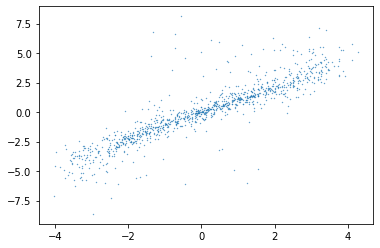

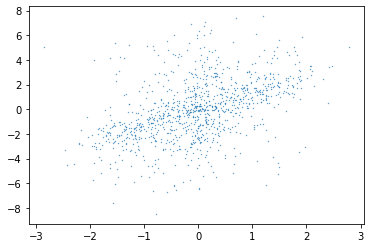

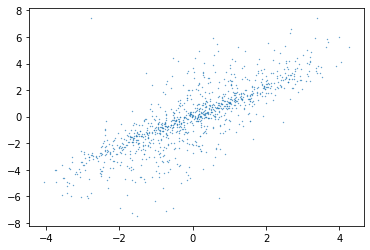

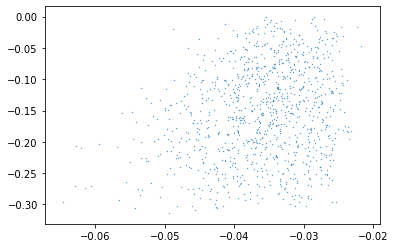

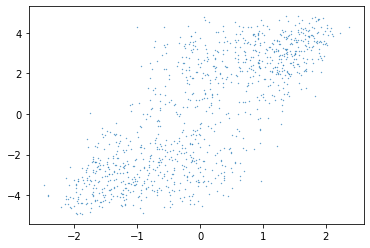

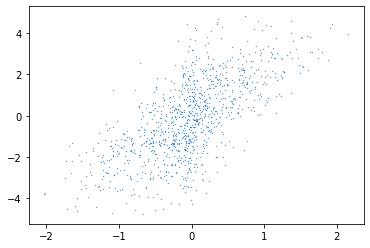

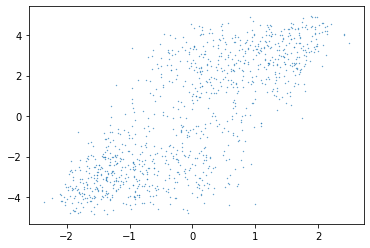

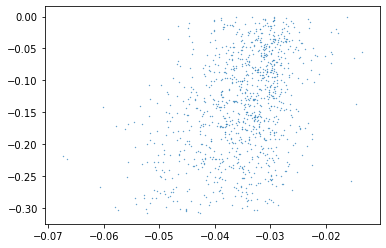

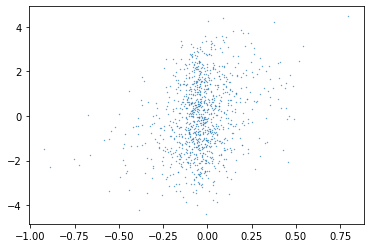

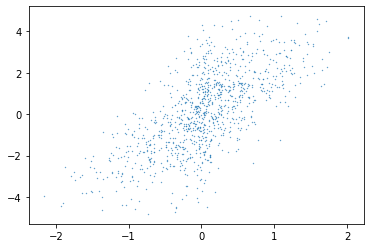

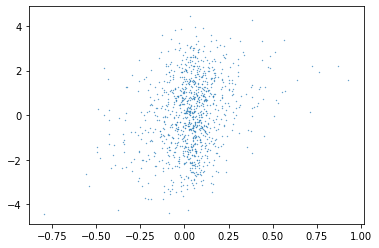

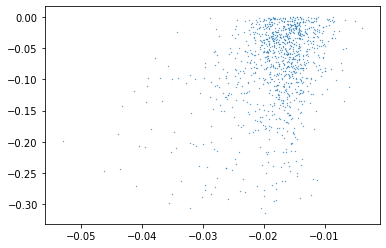

In [20]:
import matplotlib.pyplot as plt
for j in range(12):
    plt.scatter(rclasses[:, j], tclasses[:2000, j], s=.1)
    plt.show()

In [10]:
model.save("fake_ultrasound_model")

In [3]:
import matplotlib

In [4]:
plt.scatter?

Object `plt.scatter` not found.


In [4]:
tclasses[:2000, j]import tensorflow
tensorflow.test.is_gpu_available()

True

In [29]:
import tensorflow as tf
with tf.Session() as sess:
    devices = sess.list_devices()

In [1]:
import sys
sys.executable

'/home/hastings/anaconda3/envs/stylegan/bin/python'

In [38]:
#with open("prepped_data/chunk0.pickle", 'wb') as c0:
#    pickle.dump([data, classes], c0, protocol=4)

In [3]:
import pickle
data, classes = pickle.load(open("prepped_data/chunk0.pickle", "rb"))

In [42]:
data.dtype


dtype('float32')

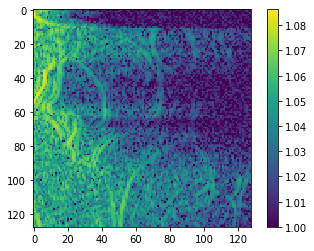

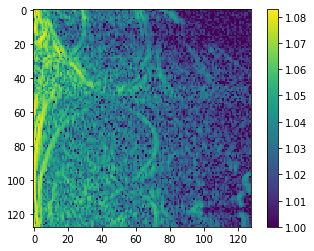

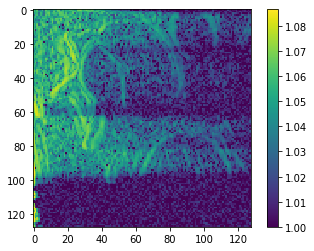

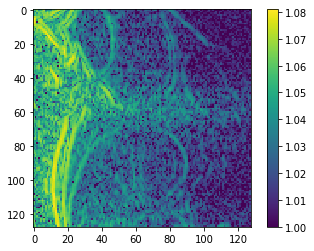

In [13]:
import matplotlib.pyplot as plt
for i in range(4):
    plt.imshow(tdata[1, :, :, i] / 10 + 1)
    plt.colorbar()
    plt.show()

In [16]:
tdata.shape

(1024, 128, 128, 4)